For bad design example, l/D ratio will be varied to 1 and original project file will be run according to this ratio.

## Project Description

In this project, a wind turbine induction generator will be designed with the following specifications:

- Rated power: 250 kW
- Rated wind speed: 14 m/s
- Rated turbine speed: 24.3 rpm
- Gear ratio: 31.2
- Number of poles: 8
- Line to line voltage: 400 V
- Frequency: 50 Hz
- Rated speed: 758 rpm
- Gearbox: Coupled from wind turbine blade
- Insulation class F

## Project Outcomes

1- Design an optimized induction motor using the Motor Analysis toolbox. Additionaly, you are free to use any software listed below during your design stage.

2- Prepare a report detailing your design process (just supplying .m files is not accepted). In the report please describe how you decided on the following aspects of the project.

- Main Dimensions (Outer diameter, air-gap diameter, axial-length, number of slots…). Please include some basic drawings.
- Material Properties, Frame size etc.
- Magnetic Circuit Details (flux density calculations at various points: air-gap, teeth, back-core etc, magnetic loading)
- Electric Circuit (Winding selection, electric loading, fill factor, phase resistance, winding factors (for fundamentalsn and for harmonics)).
- Rough thermal calculations (cooling method, operating temperature, ways to improve cooling)
- Efficiency, current, torque characteristics
- Mass Calculations (structural mass, copper mass, steel mass etc)

3- In the second part of the report, I want you to compare at least two worse designs with the optimum design presented in the first part of your report. For example, you can vary one of the following:

- Number of rotor/stator slots
- Shape of the rotor/stator slots
- Winding diagram
- Aspect Ratio of the stator and rotor etc.

## Design Steps

1. Tangential stress Ttan or the machine constant Cmec are determined according to the power, speed and cooing method of the machine. 
2. Suitable air gap is defined for the machine.
3. The rotor and stator dimensions is determined according to rated power.
4. Suitable stator winding is selected for the machine.
5. Wire diameter in stator winding is found.
6. Stator slot sizing is determined.
7. Rotor slot selection.
8. Find magnetization current.
9. Resistances and inductances are found.
10. Calculation of losses and efficiency
11. Operating characteristic.
12. Temperature rise.
13. Weight.

Let's first define input parameters:

In [92]:
from math import pi, sqrt, tan, sin, cos, exp, log, atan
Prated=250*1e3 #in Watts
WSrated=14 #in m/s
TSrated=24.3 #in rpm
Gratio=31.2 #gear ratio
Npoles=8 #number of poles
Vll=400 #in Volts
Vph=400/sqrt(3)
f=50
Rspeed=758 #in rpm
pp=Npoles/2 #numer of pole pairs

Values for efficiency and power factor are not given, those parameters will be set as the design objective:

In [93]:
pf=0.90 #power factor
eff=0.90 #efficiency
s=0.05 #slip ratio

### Step 1: Finding Cmec

In Step 1, to find the stator and rotor dimensions, [1] is selected as the reference. In order to determine Cmec, let's first calculate Power per Pole (Ppp):

In [94]:
Ppp=Prated/Npoles
print ('Power per pole =',Ppp,'in Watts')

Power per pole = 31250.0 in Watts


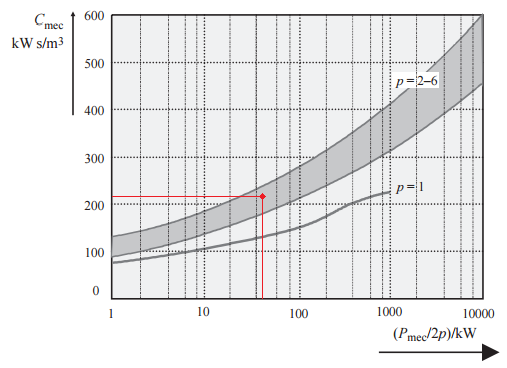

In [95]:
from IPython.display import Image
Image(filename='MachineConstant.png', width=450, height=450)

Cmec is selected as 210 kW S/m3 from the "machine constants of totally enclosed asynchronous and synchronous machines as a function of pole power" figure above.

In [96]:
Cmec=210*1e3 #in kw S/m3

### Step 2: Finding air-gap

An air gap δ of a 50 Hz asynchronous machine can be calculated in metres as a function of
power P with the equation below:

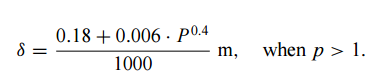

In [97]:
from IPython.display import Image
Image(filename='Formula2.png', width=250, height=250)

In [98]:
δ=(0.18+(0.006*(Prated**(0.4))))/1000
print('Air gap is =', round(δ,5),'in m')

Air gap is = 0.00105 in m


In drives for extremely heavy duty, the air gap is increased by 60%. Therefore;

In [99]:
δ=1.6*δ
print('Air gap is =', round(δ,5),'in m')

Air gap is = 0.00167 in m


However, the smallest technically possible air gap is approximately 0.2 mm according to textbook. Therefore, air gap is chosen as:

In [100]:
δ=0.002
print('Air gap is =', round(δ,3),'in m')

Air gap is = 0.002 in m


### Step 3: Finding rotor and stator dimensions

In order to find X=l/D ratio, table below is utilized. Since the desired machine is an asynchronus machine, formula in red frame:

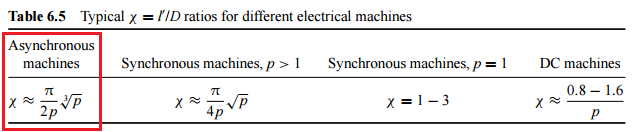

In [101]:
from IPython.display import Image
Image(filename='Table1.png', width=500, height=500)

From the formula above, ratio X can be found:

In [102]:
X=1
print ('l/D ratio is =',round(X,2))

l/D ratio is = 1


In order to find rotor diameter D and length l, formula below is utilized:

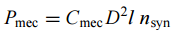

In [103]:
from IPython.display import Image
Image(filename='Formula1.png', width=150, height=150)

In [104]:
nsyn=(2*f)/Npoles
Drotor=(Prated/(Cmec*X*nsyn))**(1./3.) 
l=X*Drotor
print ('Rotor diameter is =',round(Drotor,2),'in m')
print ('Rotor length is =',round(l,2),'in m')

Rotor diameter is = 0.46 in m
Rotor length is = 0.46 in m


Since we both know rotor diameter and airgap length, we can find inner diameter of the stator:

In [105]:
Dstator_in=Drotor+δ
print('Inner stator diameter is =', round(Dstator_in,2))

Inner stator diameter is = 0.46


According to course textbook, the best theoretical diameter ratio (the ratio of the inner diameter of the stator to the outer diameter)is approximately 0.6. Then, we can calculate the stator diameter as below:

In [106]:
Dstator_out=Drotor/0.6
print('Outer stator diameter is =', round(Dstator_out,2),'in m')

Outer stator diameter is = 0.76 in m


### Step 4: Stator winding 

Let's first choose the nuber of stator slots Ns:

In [107]:
m=3 #machine is 3-phase
q=4 #larger q reduces harmonics and losses
Ns=2*pp*q*m
print('Number of stator slots is', Ns)

Number of stator slots is 96.0


According to reference [2], a two layer winding with chorded coils y/τ is chosen as yτ=10/12 to reduce 5th order stator mmf space harmonic, where τ pole pitch in m.

In [108]:
yτ=10/12
τ=(pi*Dstator_in)/(2*pp)#pole pitch
τs=τ/(m*q) #slot pitch
print('Pole pitch is', round(τ,2),'in m')
print('Slot pitch is', round(τs,2),'in m')
      

Pole pitch is 0.18 in m
Slot pitch is 0.02 in m


In [109]:
Kql=sin(pi/6)/(q*sin(pi/(6*q))) #zone factor
Kyl=sin((pi/2)*(yτ)) #chording factor
Kwl=Kql*Kyl #stator winding factor

print('Kql =', round(Kql,2))
print('Kyl =', round(Kyl,2))
print('Kwl =', round(Kwl,2))

Kql = 0.96
Kyl = 0.97
Kwl = 0.93


From Eq. 15.11 in reference [2], airgap flux density Bg is selected as 0.80 T.
The pole spanning coefficient αi is 1 + Kst, where Kst is tooth saturation factor. It is chosen as 1.4.
Therefore we can find pole flux φ based on the Eq 15.10 in reference [2].

In [110]:
Bg=0.80 #airgap flux density
αi=1.4 #pole spanning coefficient
φ=αi*τ*l*Bg #pole flux
KE=0.98-0.005*pp #from Eq. 15.1 in reference [2]
Kf=1.085
Wl=(KE*(Vll/sqrt(3)))/(4*Kf*Kwl*f*φ)
print('Pole flux is', round(φ,2),'in Wb')
print('Number of turns per phase is', round(Wl,2))

Pole flux is 0.09 in Wb
Number of turns per phase is 11.99


Let's choose number of current paths in parallel al=2: Then, number of conductors per slot ns is:

In [111]:
al=2
ns=(al*Wl)/(pp*q)
print('Number of conductors per slot is', round(ns,2))

Number of conductors per slot is 1.5


It is stated in [2] that, ns should be an even number as there are two distinct coils per slot in a double layer winding. Therefore ns can be chosen as 2. Then if we recalcuate Wl and Bg:

In [112]:
ns=2
Wl=pp*q*ns
Bg=0.8*(14.44/Wl)
print('Number of turns per phase is', round(Wl,2))
print('Airgap flux density', round(Bg,2), 'in T')

Number of turns per phase is 32.0
Airgap flux density 0.36 in T


### Step 5: Finding wire diameter

Now, time is to find te wire diameter in stator winding. In order to do this phase current will be calculated.

In [113]:
Iln=Prated/(eff*pf*sqrt(3)*Vll)
print('Rated phase current is', round(Iln,2), 'in A')

Rated phase current is 445.49 in A


In [114]:
Jcos=5 #chosen current density in A/mm2
Aco=Iln/(Jcos*al)
print('Wire cross section', round(Aco,2), 'in mm2')

Wire cross section 44.55 in mm2


Wire gauge diameter dco:

In [115]:
dco=sqrt((4*Aco)/pi)
print('Wire diameter', round(dco,2), 'in mm')

Wire diameter 7.53 in mm


dco>1.3mm, conductors can be used in parallel for in low power induction motors:

In [116]:
ap=42 #number of parallel conductors
dco=sqrt((4*Aco)/(pi*ap))
print('Wire diameter', round(dco,2), 'in mm')

Wire diameter 1.16 in mm


### Step 6: Stator Slot Sizing 

Useful slot area Asu:

In [117]:
Kfill=0.42 #changes 0.4 to 0.44 above 10kW
Asu=(pi*dco*dco*ap*ns)/(4*Kfill)
print('Useful slot area', round(Asu,2), 'in mm2')

Useful slot area 212.14 in mm2


Among the slot shapes, trapezoidal shape is selected. In the figure below, you can see stator slot dimensions.

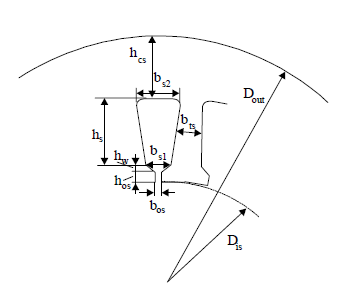

In [118]:
Image(filename='StatorSlotGeometry.png', width=300, height=300)

In [2], dimensions bos, hos and hw are given.

In [119]:
bos=2.5*1e-3 #in m
hos=1e-3 #in m
hw=2*1e-3 #in mm
Kfe=0.96 #for 0.5mm thick lamination
Bts=1.8 #in Tesla
bts=(τs*Bg)/(Bts*Kfe) 
bs1=((pi*(Dstator_in+(2*hos)+(2*hw)))/Ns)-bts
bs2=sqrt(4*(Asu/1e6)*tan(pi/Ns)+(bs1*bs1))
hs=(2*(Asu/1e6))/(bs1+bs2)
print('Tooth width bts ', round(bts,4), 'in m')
print('Slot lower width bs1', round(bs1,4), 'in m')
print('Slot upper width bs2 ', round(bs2,4), 'in m')
print('Slot useful height hs ', round(hs,4), 'in m')

Tooth width bts  0.0031 in m
Slot lower width bs1 0.0121 in m
Slot upper width bs2  0.0132 in m
Slot useful height hs  0.0168 in m


Now, let's check whether Fmtr is larger than Fmts. If it is larger, we can go on with design process, if not an iteration with smaller air gap flux density Bg will be needed.

In [120]:
μ0=1.256*1e-6
Fmg=1.2*δ*(Bg/μ0)
print('Airgap mmf is', round(Fmg,2), 'in Aturns')

Airgap mmf is 689.81 in Aturns


In [121]:
Hts=8270 #in A/m according to Table 15.4 in [2]
Fmts=Hts*(hs+hos+hw)
print('Stator tooth mmf is', round(Fmts,2), 'in Aturns')

Stator tooth mmf is 163.82 in Aturns


In [122]:
Kst=1.4-0.97
Fmtr=(Kst*Fmg)-Fmts
print('Rotor tooth mmf is', round(Fmtr,2), 'in Aturns')

Rotor tooth mmf is 132.8 in Aturns


Since Fmtr is slightly larger than Fmts, we can continue to design process.

In [123]:
hcs=(Dstator_out-(Dstator_in+2*(hos+hw+hs)))/2
Bcs=φ/(2*l*hcs)
print('Stator back iron height hcs', round(hcs,2), 'in m')
print('Back core flux density is', round(Bcs,2), 'in T')

Stator back iron height hcs 0.13 in m
Back core flux density is 0.77 in T


Bcs is not within 1.4T to 1.7T. In order to decrease the Bcs, there are two main options. First is to decrease stator diameter. Second, shortening the lenght of the stator. The easy way is the first option, hence Dstator_out is modified to 0.72 m (ex value is 0.89m). If we recalculate hcs and Bcs:

In [124]:
Dstator_out=0.72 #in m
hcs=(Dstator_out-(Dstator_in+2*(hos+hw+hs)))/2
Bcs=φ/(2*l*hcs)
print('New outer stator diameter is =', round(Dstator_out,2),'in m')
print('Stator back iron height hcs', round(hcs,2), 'in m')
print('Back core flux density is', round(Bcs,2), 'in T')

New outer stator diameter is = 0.72 in m
Stator back iron height hcs 0.11 in m
Back core flux density is 0.91 in T


### Step 7: Rotor slots selection

Relation between stator and rotor slot numbers affects the parasitic torque, additional losses, radial forces, noise and vibration. In [3], common stator/rotor slot combinations are given. Relating to this reference, rotor slot number is selected as 44. 

In [125]:
Nr=72 #number of rotor slots

Next is to determine the slot shape and dimensions. For slot shape; among the choices below, option c is selected.

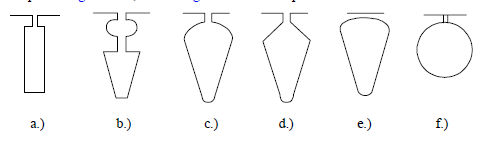

In [126]:
Image(filename='RotorSlotShape.png', width=400, height=400)

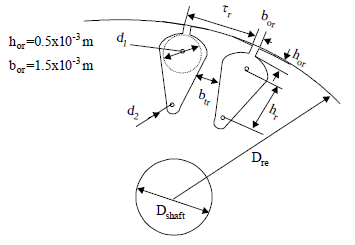

In [127]:
Image(filename='RotorSlotGeometry.png', width=400, height=400)

Before determining the slot dimensions, rotor bar current has to be decided:

In [128]:
KI=0.8*pf+0.2
Ib=(2*KI*m*Wl*Kwl*Iln)/Nr
print('Rotor bar current', round(Ib,2), 'in A')

Rotor bar current 1010.99 in A


For high efficiency, the current density in the rotor bar Jb=3.4 A/mm2. Then rotor slot area Ab is:

In [129]:
Jb=3.4*1e6 #in A/m2
Ab=Ib/Jb
print('Rotor slot area is', round(Ab,6), 'in m2')
Ier=Ib/(2*sin((pi*pp)/Nr))
print('End ring current is', round(Ier,2), 'in A')
Jer=0.75*Jb
Aer=Ier/Jer
print('End ring cross section area is', round(Aer,6), 'in m2')
τr=(pi*(Dstator_in-2*δ))/Nr
Dre=Dstator_in-2*δ
print('The rotor slot pitch τr is', round(τr,6), 'in m')

Rotor slot area is 0.000297 in m2
End ring current is 2911.03 in A
End ring cross section area is 0.001142 in m2
The rotor slot pitch τr is 0.019839 in m


In [130]:
Btr=1.8 #in T, rotor tooth flux density
btr=(Bg*τr)/(Kfe*Btr) #tooth width in m
hor=0.5*1e-3 #in m
bor=1.5*1e-3 #in m
print('The tooth width btr is', round(btr,6), 'in m')
dl=(pi*(Dre-2*hor)-(Nr*btr))/(pi+Nr)
print('dl is', round(dl,6), 'in m')

The tooth width btr is 0.004145 in m
dl is 0.014996 in m


From Eq. 15.43 and 15.44 in [2] d2 and hr are found as follows:

In [131]:
d2=0.014 #in m
hr=0.008 #in m

In [132]:
Htr=6160 #in A/m for Btr=1.1T according to Table 15.4 in [2]
Vmtr=Htr*(hr+hor+((dl+d2)/2))
print('Rotor teeth mmf is', round(Vmtr,6), 'in Aturns')

Rotor teeth mmf is 141.668435 in Aturns


This value is close to Fmtr found in Step 6. Therefore, the design is ok for now.

In [133]:
Bcr=1.65 #in Tesla
hcr=φ/(2*l*Bcr)
print('Rotor back core height is', round(hcr,6), 'in m')

Rotor back core height is 0.061132 in m


In [134]:
Dshaft=Dre-2*(hor+(dl+d2)/2+hr+hcr)
print('Max diameter of te shaft is', round(Dshaft,6), 'in m')

Max diameter of te shaft is 0.286412 in m


In [135]:
Ten=Prated/(2*(pi/pp)*f*(1-s))
print('Rated torque is', round(Ten,2), 'in Nm')

Rated torque is 3350.63 in Nm


End ring dimension are found as below:

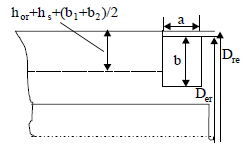

In [136]:
Image(filename='EndRingDimensions.png', width=300, height=300)

In [137]:
Der=Dre-3.5e-3 
b=1.1*(hr+hor+(dl+d2)/2)
a=Aer/b
print('Der:', round(Der,4), 'in m')
print('b:', round(b,4), 'in m')
print('a:', round(a,4), 'in m')

Der: 0.4512 in m
b: 0.0253 in m
a: 0.0451 in m


### Step 8: Magnetization Current 

In order to find the magnetization current, we need to find the total Carter coefficient as below.

In [138]:
γ1=bos**2/(5*δ+bos)
γ2=bor**2/(5*δ+bor)
Kc1=τs/(τs-γ1)
Kc2=τr/(τr-γ2)
Kc=Kc1*Kc2
print('Total Carter coeefficient is', round(Kc,2))

Total Carter coeefficient is 1.04


In [139]:
Ccs=0.88*(exp(-0.4*(Bcs**2)))
Ccr=0.88*(exp(-0.4*(Bcr**2)))
Hcs=2460 #rotor back core flux density in A/m at Bcr=1.59T
Hcr=3460 #rotor back core flux density in A/m at Bcr=1.65T
Fmcs=(Ccs*pi*(Dstator_out-hcs)*Hcs*Bcs)/(2*pp)
Fmcr=(Ccr*pi*(Dshaft-hcr)*Hcr*Bcr)/(2*pp)
Flm=2*(Kc*δ*(Bg/μ0)+Fmts+Fmtr+Fmcs+Fmcr)
Ks=(Flm/(2*Fmg))-1 #total saturation factor
Iμ=(pi*pp*Flm)/(2*3*sqrt(2)*Wl*Kwl) #magnetization current
iμ=Iμ/Iln
print('Rotor tooth mmf is', round(Flm,2), 'in Aturns')
print('Total saturation factor is', round(Ks,2))
print('Magnetization current is', round(Iμ,2), 'in A')
print('p.u. value of Iμ is', round(iμ,2))

Rotor tooth mmf is 2770.24 in Aturns
Total saturation factor is 1.01
Magnetization current is 138.6 in A
p.u. value of Iμ is 0.31


### Step 9: Resistances and Inductances 

Equivalent circuit of the motor given in the figure below:

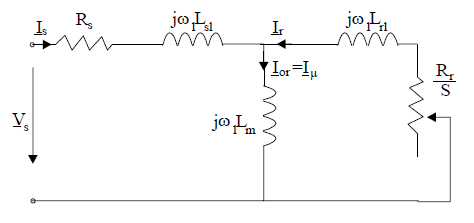

In [140]:
Image(filename='EquivalentCircuit.png', width=400, height=400)

#### Stator resistance Rs 

In [141]:
y=yτ*τ #finding y from chording facot y/τ
lend=2.2*y-0.012 #end connection length in m
lc=2*(l+lend) #coil length in m
ρco20=1.78*1e-8 #copper resistance in ohm.m at 20C
ρco80=ρco20*(1+(80-20)/273) #copper resistance at 80C
Rs=(ρco80*lc*Wl*1e6)/(Aco*al) #stator phase resistance
print('Stator resistance', round(Rs,6), 'in ohm')

Stator resistance 0.012085 in ohm


#### Rotor bar/end ring segment equivalent resistance Rbe

In [142]:
ler=pi*(Der-b)/Nr #end ring segment length
ρAl20=3.1*1e-8 #aluminium resistivitiy at 20C
ωl=2*pi*f
βs=sqrt(ωl*μ0/(2*ρAl20))
ξ=βs*hr #skin effect coefficient for Aluminium
KR=ξ #Eq. 15.72 in [2]
Rbe=ρAl20*(l*KR/Ab+ler/(2*Aer*sin(pi*pp/Nr)*sin(pi*pp/Nr)))
print('Rotor bar/end ring segment equivalent resistance is', round (Rbe,6), 'in ohm')

Rotor bar/end ring segment equivalent resistance is 3.9e-05 in ohm


#### Rotor cage resistance reflected to the stator Rr_stator

In [143]:
Rr_stator= 4*m*((Wl*Kwl)**2)*Rbe/Nr
print('Rotor cage resistance reflected to the stator is', round(Rr_stator,4),'in ohm')

Rotor cage resistance reflected to the stator is 0.0057 in ohm


#### Stator phase leakage reactance Xsl 

In [144]:
#slot differential and end ring connection coefficients λs, λds, λec
β=yτ
λs=(((2/3)*hs/(bs1+bs2))+(2*hw/(bos+bs1))+hos/bos)*(1+3*β)/4
Cs=1-0.033*(bos**2)/(δ*τs)
ϕ1=pi*(6*β-5.5)
γds=(0.14*sin(ϕ1)+0.76)*1e-2 #for q=4
λds=0.9*τs*(q**2)*(Kwl**2)*Cs*γds/(Kc*δ*(1+Kst))
λec=0.34*q*(lend-0.64*β*τ)/l
print('λs:', round(λs,3))
print('λds:', round(λds,3))
print('λec:', round(λec,3))
Xsl=2*μ0*ωl*l*(Wl**2)*(λs+λds+λec)/(pp*q)
Xec=(Xsl/(λs+λds+λec))*λec
print('Stator end winding reactance is', round(Xec,4),'in ohm')
print('Stator phase leakage reactance is', round(Xsl,4),'in ohm')

λs: 0.979
λds: 0.381
λec: 0.662
Stator end winding reactance is 0.0153 in ohm
Stator phase leakage reactance is 0.0466 in ohm


#### Equivalent rotor bar leakage reactance Xbe 

In [145]:
#slot differential and end ring connection coefficients λr, λdr, λer
λr=0.66+2*hr/(3*(dl+d2))+hor/bor
γdr=9*((6*pp/Nr)**2)*1e-2
Kx=3/(2*ξ) #skin effect coefficient
λdr=0.9*τr*γdr*((Nr/(6*pp))**2)/(Kc*δ)
λer=2.3*(Der-b)*log(4.7*(Der-b)/(b+2*a))/(Nr*l*4*(sin(pi*pp/Nr)**2))
Xbe=2*pi*f*μ0*l*(λr*Kx+λdr+λer)
print('λr:', round(λr,4))
print('λdr:', round(λdr,4))
print('λer:', round(λer,4))
print('Equivalent rotor bar leakage reactance Xbe is', round(Xbe,4),'in ohm')

λr: 1.1773
λdr: 0.769
λer: 0.7044
Equivalent rotor bar leakage reactance Xbe is 0.0008 in ohm


#### Rotor leakage reactance Xrl 

In [146]:
Xrl=4*m*((Wl*Kwl)**2)*Xbe/Nr
print('Rotor leakage reactance Xrl is', round(Xrl,4), 'in ohm')

Rotor leakage reactance Xrl is 0.1116 in ohm


At lower speeds, both stator and rotor leakage reactances are reduced due to leakage flux path saturation.

In [147]:
Xsl_sat=Xsl*0.75
Xrl_sat=Xrl*0.65
print('Xsl_s:', round(Xsl_sat,4))
print('Xrl_s:', round(Xrl_sat,4))

Xsl_s: 0.035
Xrl_s: 0.0725


For rated slip, both skin and leakage saturation effects have to be eleminated (KR*Kx=1)

In [148]:
ρAl80=ρAl20*(1+(80-20)/273)
Rbe_sn=ρAl80*(l/Ab*1+ler/(2*Aer*sin(pi*pp/Nr)*sin(pi*pp/Nr)))
Rr_stator_sn=Rr_stator*(Rbe/Rbe_sn)
Xbe_sn=2*pi*f*μ0*l*(λr*1+λdr+λer)
Xrl_sn=Xrl*(Xbe/Xbe_sn)
print('Rbe_sn:', round(Rbe_sn,6))
print('Rr_stator_sn', round(Rr_stator_sn,4))
print('Xbe_sn:', round(Xbe_sn,4))
print('Xrl_sn:', round(Xrl_sn,4))

Rbe_sn: 6.8e-05
Rr_stator_sn 0.0032
Xbe_sn: 0.0005
Xrl_sn: 0.1785


#### Magnetization reactance Xm

In [149]:
Xm=sqrt((Vph/Iμ)**2-Rs**2)-Xsl
print('Magnetization reactance Xm is', round(Xm,4), 'in ohm')

Magnetization reactance Xm is 1.6196 in ohm


#### Skewing effect on reactances

In [150]:
c=τs
Kskew=sin(pi*c/(2*τ))/(pi*c/(2*τ))
Xm=Xm*Kskew
Xrl_skew=Xm*(1-Kskew**2)
Xrl_sat_skew=Xrl_sat+Xrl_skew
Xrl_sat_skew_sn=Xrl+Xrl_skew
print('Kskew:', round(Kskew,4))
print('Xm:', round(Xm,4))
print('Xrl_skew:', round(Xrl_skew,4))
print('Xrl_sat_skew:', round(Xrl_sat_skew,4))
print('Xrl_sat_skew_sn:', round(Xrl_sat_skew_sn,4))

Kskew: 0.9971
Xm: 1.615
Xrl_skew: 0.0092
Xrl_sat_skew: 0.0817
Xrl_sat_skew_sn: 0.1208


### Step 10: Losses & efficiency

In [151]:
Pco=3*Rs*Iln**2 #stator winding loss
Pal=3*Rr_stator*(Iln**2) #rotor cage loss
Pmv=0.008*Prated #mechanical/ventilation loss
Pstray=0.01*Prated #stray loss

print('Stator winding loss is', round(Pco), 'in Watts')
print('Rotor cage loss is', round(Pal), 'in Watts')
print('Mechanical/ventilation loss is', round(Pmv), 'in Watts')
print('Stray loss is', round(Pstray), 'in Watts')

Stator winding loss is 7195 in Watts
Rotor cage loss is 3369 in Watts
Mechanical/ventilation loss is 2000 in Watts
Stray loss is 2500 in Watts


In [152]:
γiron=7800 #iron density in kg/m3
Kt=1.7 #loss augmentation due to mechanical stamping
P10=2.5 #specific loss at 1 Tesla and 50 Hz in W/kg
Gtl=γiron*Ns*bts*(hs+hw+hos)*l*Kfe #stator tooth weight in kg
Ptl=Kt*P10*((f/50)**1.3)*(Bts**1.7)*Gtl #stator teeth fundamenteal loss
print('Stator teeth fundamental loss is', round(Ptl), 'in Watts')

Stator teeth fundamental loss is 235 in Watts


In [153]:
Gts=γiron*(pi/4)*(Dstator_out**2-(Dstator_out**2-2*hcs)**2)*l*Kfe #yoke weight in kg
Ky=1.75 #influence of mechanical machining
Pyl=Ky*P10*((f/50)**1.3)*(Bcs**1.7)*Gts
print('Stator back iron (yoke) fundamental loss is', round(Pyl), 'in Watts')

Stator back iron (yoke) fundamental loss is 4307 in Watts


In [154]:
Piron_1=Ptl+Pyl
print('Fundamental iron loss is', round(Piron_1), 'in Watts')

Fundamental iron loss is 4542 in Watts


In [155]:
Kps=1/(2.2-Bts)
Kpr=1/(2.2-Btr)
Bps=(Kc2-1)*Bg #in Tesla
Bpr=(Kc1-1)*Bg #in Tesla
Gtr=γiron*l*Kfe*Nr*(hr+(dl+d2)/2)*btr #rotor tooth weight in kg
Piron_s=0.5*1e-4*((Nr*f*Kps*Bps/pp)**2*Gts+(Ns*(f/pp)*Kpr*Bpr)**2*Gtr)
print('Tooth flux pulsation core loss is', round(Piron_s), 'in Watts')

Tooth flux pulsation core loss is 5 in Watts


In [156]:
Piron=Piron_1+Piron_s
print('Total core loss is', round(Piron),'in Watts')

Total core loss is 4548 in Watts


In [157]:
Total_loss=Pco+Pal+Pmv+Pstray+Piron
print('Total loss is', round(Total_loss),'in Watts')

Total loss is 19612 in Watts


In [158]:
eff_calculated=Prated/(Prated+Total_loss)
print('Calculated efficiency is', round(eff_calculated,2))

Calculated efficiency is 0.93


Targeted efficiency is 0.90, therefore the design satisfies this with a slight difference.

### Step 11: Operation Characteristic

The operation characteristics are defined as active no load current I0a, rated slip Sn, rated torque Tn, breakdown slip and torque Sk, Tbk, current Is and power factor versus slip, starting current, and torque ILR, TLR.

In [159]:
I0a=(Piron+Pmv+3*(Iμ**2)*Rs)/(3*Vph)
sn=Pal/(Prated+Pal+Pmv+Pstray)
Tn=Prated/(2*pi*(f/pp)*(1-sn))
Tbk=(3*pp/(2*ωl))*(Vph**2/(Rs+sqrt(Rs**2+(Xsl+Xrl_sat_skew_sn)**2)))
ILR=Vph/(sqrt((Rs+Rr_stator_sn)**2+(Xsl_sat+Xrl_sn)**2))
TLR=3*Rr_stator_sn*(ILR**2)*pp/ωl
pf_calculated=Prated/(3*Vph*Iln*eff)
print('Active load current is', round(I0a,2),'in A')
print('Rated slip is', round(sn,2))
print('Rated shaft torque is', round(Tn,2), 'in Nm')
print('Breakdown torque is', round(Tbk,2), 'in Nm') 
print('Starting current is', round(ILR,2),'in A')
print('Power factor is', round(pf_calculated,2))                   

Active load current is 10.46 in A
Rated slip is 0.01
Rated shaft torque is 3225.24 in Nm
Breakdown torque is 5660.94 in Nm
Starting current is 1079.05 in A
Power factor is 0.9


Calculated power factor is perfectly equal to target of design, therefore design does not need any iterations.

### Step 12: Temperature Rise

In [160]:
αconv=32 #in W/m2K for pp=4 
λins=0.25 #insulation thermal conductivity in W/mK
hins=0.3*1e-3 #total insulation thickness
Kfin=4 #frame area multiplication by fins to increase heat transfer
θamb=25 #ambient temperature in C
αcond=λins/hins #in W/m2K slot insulation 
Als=(2*hs+bs2)*l*Ns #stator lateral area in m2
Aframe= pi*Dstator_out*(l+τ)*Kfin #frame area in m2
Δθco=Pco/(αcond*Als) #temperature differential between the conductors in slots and slot wall
Δθframe=Total_loss/(αconv*Aframe) #frame temperature rise with respect to ambient air
θco=θamb+Δθco+Δθframe
print('αcond:', round(αcond,2),'in W/m2K')
print('Als:', round(Als,2),'in m2')
print('Aframe:', round(Aframe,2),'in m2')
print('Δθco:', round(Δθco,2),'in C')
print('Δθframe:', round(Δθframe,2),'in C')
print('θco:', round(θco,2),'in C')

αcond: 833.33 in W/m2K
Als: 2.05 in m2
Aframe: 5.76 in m2
Δθco: 4.21 in C
Δθframe: 106.38 in C
θco: 135.58 in C


Maximum operating temperature of the machine is found to be 200C. Insulation class F allows maximum of 155C temperature. Therefore, we need to increase the frame area by increasing fin factor Kfin=6.

In [161]:
Kfin=6
αcond=λins/hins #in W/m2K slot insulation 
Als=(2*hs+bs2)*l*Ns #stator lateral area in m2
Aframe= pi*Dstator_out*(l+τ)*Kfin #frame area in m2
Δθco=Pco/(αcond*Als) #temperature differential between the conductors in slots and slot wall
Δθframe=Total_loss/(αconv*Aframe) #frame temperature rise with respect to ambient air
θco=θamb+Δθco+Δθframe
print('αcond:', round(αcond,2),'in W/m2K')
print('Als:', round(Als,2),'in m2')
print('Aframe:', round(Aframe,2),'in m2')
print('Δθco:', round(Δθco,2),'in C')
print('Δθframe:', round(Δθframe,2),'in C')
print('θco:', round(θco,2),'in C')

αcond: 833.33 in W/m2K
Als: 2.05 in m2
Aframe: 8.64 in m2
Δθco: 4.21 in C
Δθframe: 70.92 in C
θco: 100.13 in C


Max temperature is found to be 145C.

#### Step 13: Weight

In [162]:
Wstator=Gtl+Gts #stator weight in kg
Wrotor=Gtr #rotor weight in kg
d_co=8940 #copper density in kg/m3
Wco_stator=d_co*lc*Wl*Aco*1e-6*m #stator copper weight in kg
Wco_rotor=d_co*(Ab*l+Aer*ler)*Nr #rotor copper weight in kg
Wshaft=γiron*(pi/4)*(Dshaft**2) #haft weight in kg
Wtotal=Wstator+Wrotor+Wco_stator+Wco_rotor+Wshaft
print('Stator weight is', round(Wstator,2),'in kg')                     
print('Rotor weight is', round(Wrotor,2),'in kg')
print('Shaft weight is', round(Wshaft,2),'in kg')
print('Stator copper weight is', round(Wco_stator,2),'in kg')
print('Rotor copper weight is', round(Wco_rotor,2),'in kg')
print('Total weight is', round(Wtotal,2),'in kg')

Stator weight is 1176.26 in kg
Rotor weight is 22.96 in kg
Shaft weight is 502.53 in kg
Stator copper weight is 59.25 in kg
Rotor copper weight is 101.06 in kg
Total weight is 1862.06 in kg


# Motor Analysis Results in MATLAB

Now, it's time to apply the results found for the machine design in Motor Analysis tool in MATLAB.

## 1. Motor Geometry

In order to draw the motor geometry, in addition to parameters calculated during the design process, parameters below will be found to provide input to Geometry Editor of Motor Analysis.

In [163]:
#Stator slot parameters
Sds=(hs+hw+hos)/2 #slot depth in m
Tas=atan(hw/((bs1-bos)/2))*(400/(2*pi)) #tooth tip angle
Rcs=(bs2-bs1)/2*sqrt(2)/2 #slot corner radius
print('Sds:', round(Sds,4), 'in m')
print('Tas:', round(Tas,2),'in rad') 
print('Rcs:', round(Rcs,4),'in m') 

Sds: 0.0099 in m
Tas: 25.2 in rad
Rcs: 0.0004 in m


In [164]:
#Rotor slot parameters
Tar=45*(400/(2*180)) #tooth tip angle in rad
Sdr=hor+hr+dl/2+d2/2#slot depth in m
Rcr=d2/2 #slot corner radius
print('Sdr:', round(Sdr,4), 'in m')
print('Tar:', round(Tar,2),'in rad')
print('Rcr:', round(Rcr,4),'in m') 

Sdr: 0.023 in m
Tar: 50.0 in rad
Rcr: 0.007 in m


In [165]:
#Axial parameters
RBskew=atan(τs/l)*(400/(2*pi)) #Rotor bar skew in grad
print('RBskew:', round(RBskew,2),'in rad')

RBskew: 2.09 in rad


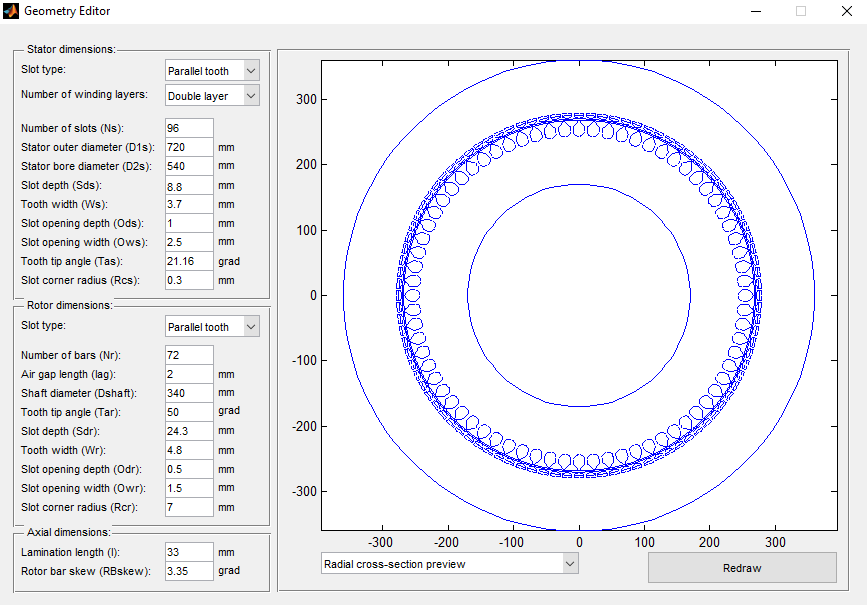

In [166]:
Image(filename='RadialCSectionPreview.png', width=750, height=750)

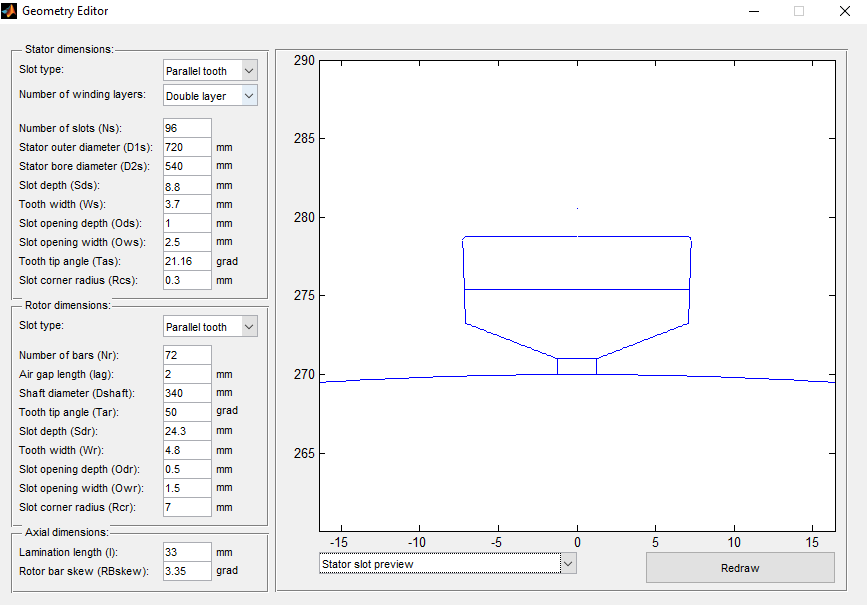

In [167]:
Image(filename='StatorSlotPreview.png', width=750, height=750)

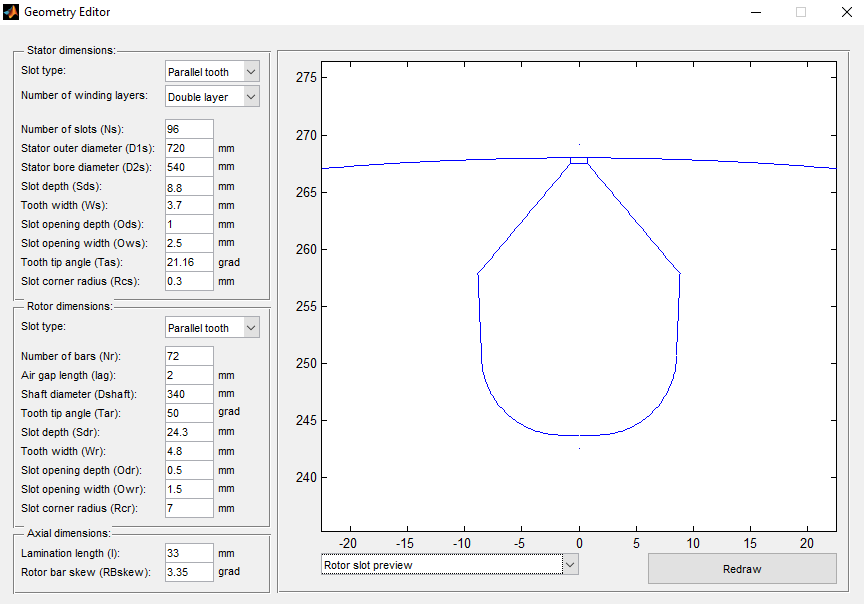

In [168]:
Image(filename='RotorSlotPreview.png', width=750, height=750)

## 2. Windings Property Editor 

In order to draw the windings, in addition to parameters calculated during the design process, parameters below will be found to provide input to Windings Property Editor of Motor Analysis.

In [169]:
#stator winding parameters
Lsew=Xec/(2*pi*f) #end winding inductance
ks=1/ρco80 #winding material conductivity
print('Lsew:', round(Lsew,6), 'in H')
print('ks:', round(ks,2), 'in S/m')

Lsew: 4.9e-05 in H
ks: 46057293.25 in S/m


In [170]:
#rotor winding parameters
kr=1/ρAl80 #winding material conductivity
print('kr:', round(kr,2), 'in S/m')

kr: 26445800.64 in S/m


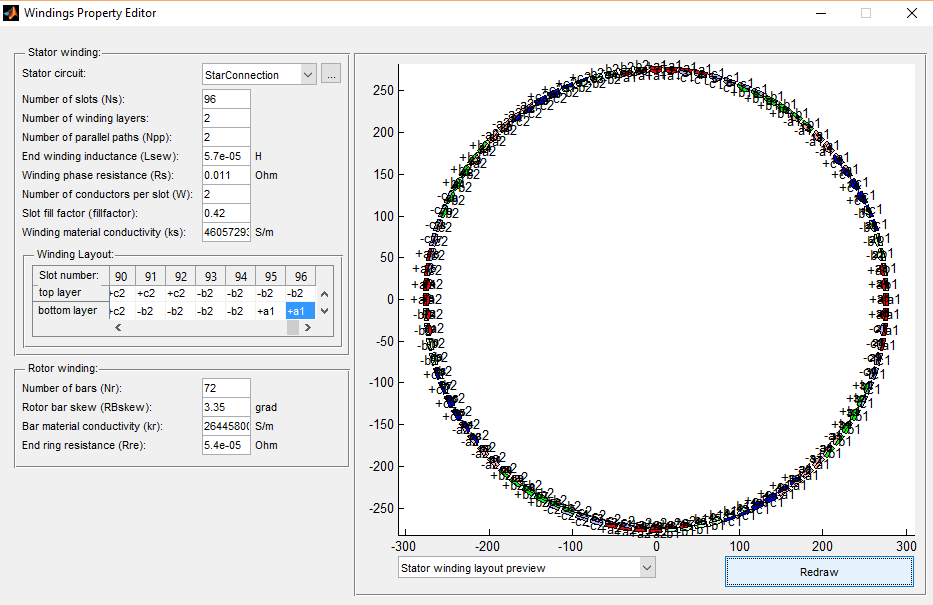

In [171]:
Image(filename='WindingPropertyEditor.png', width=750, height=750)

## 3. Iron Core Property Editor

As iron core, electrical steel 35ZH35 is selected. Its B-H curve is can be shown below in the iron core property editor of Motor Analysis

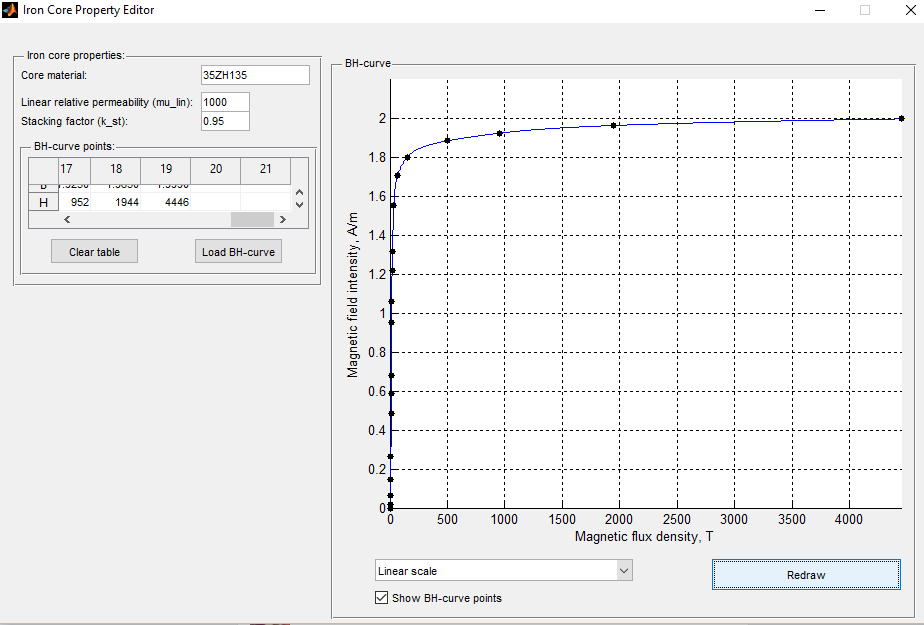

In [172]:
Image(filename='IronCorePropertyEditor.png', width=750, height=750)

## 4. Mesh Editor

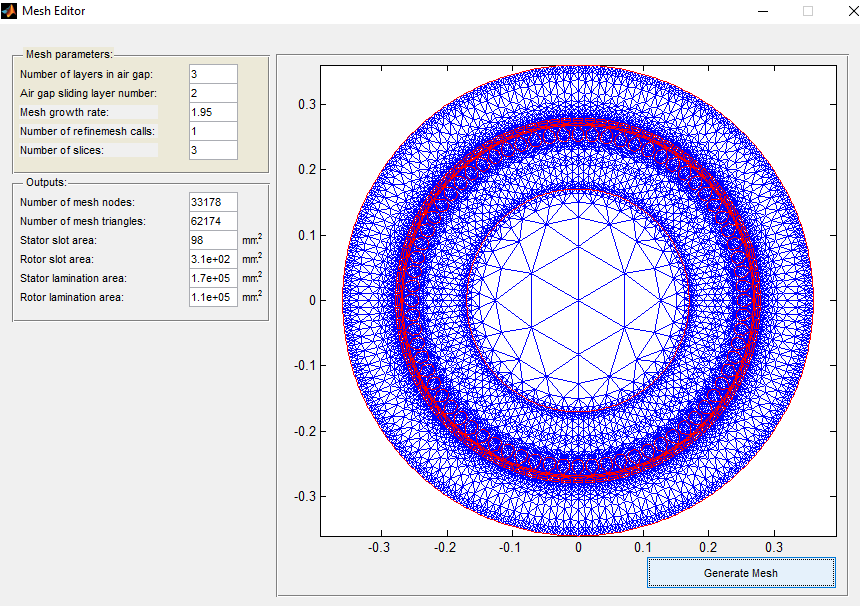

In [173]:
Image(filename='MeshEditor.png', width=750, height=750)

## 5. Results 

In [174]:
Jin=0.5*pi*(Dre**2)/4*l*γiron*((Dre/2)**2)
print('Moment of inertia', round(Jin,2),'in kg/m2')

Moment of inertia 14.94 in kg/m2


Simulation in the motor analysis is taken for 0.35 seconds of interval. Simulation is hold at conditions below. At 0.2s, torque of 3000NM is applied to the response of the motor. It took about 4 hours to complete the simulation in a computer with Intel i5 processor and 8GB ram. Longer simulation time would result in excessive hours of processing, hence simulation interval is set as 0.35 seconds.

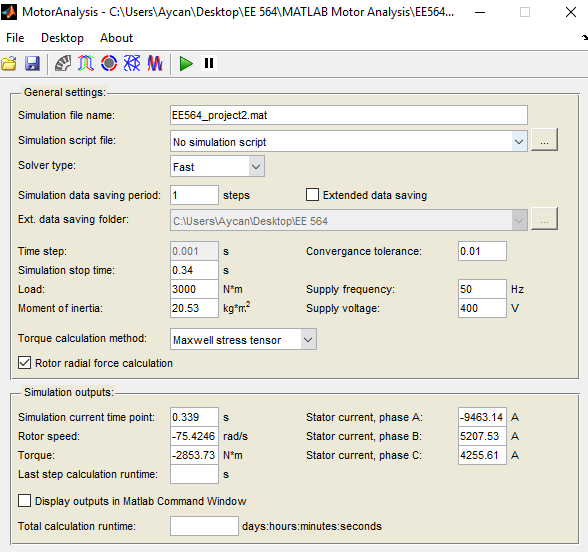

In [175]:
Image(filename='MotorAnalysisSimulation.png', width=500, height=500)

#### Phase Currents 

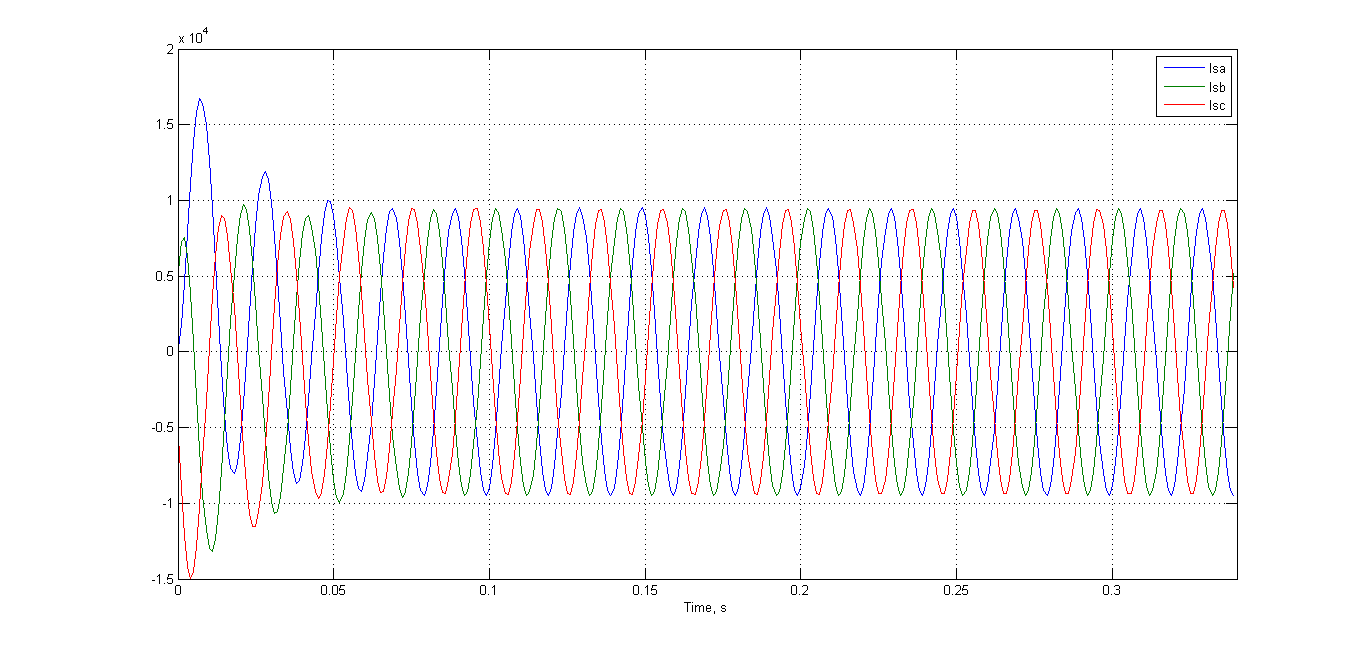

In [176]:
Image(filename='PhaseCurrents.png', width=1000, height=700)

#### Input and Output Power 

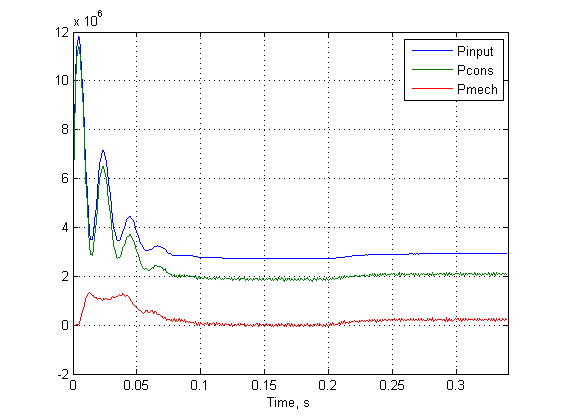

In [177]:
Image(filename='PowerGraph.png', width=1000, height=700)

#### Torque 

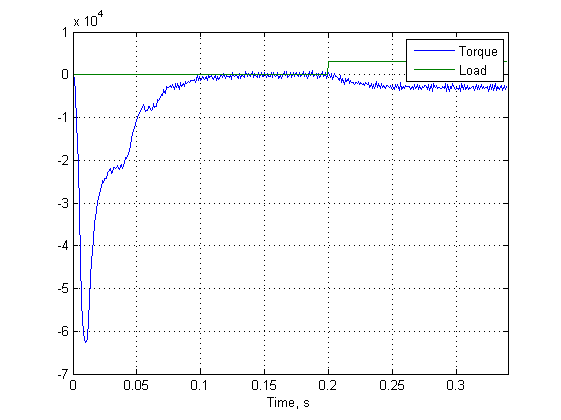

In [178]:
Image(filename='TorqueGraph.png', width=500, height=300)

#### Air gap distribution 

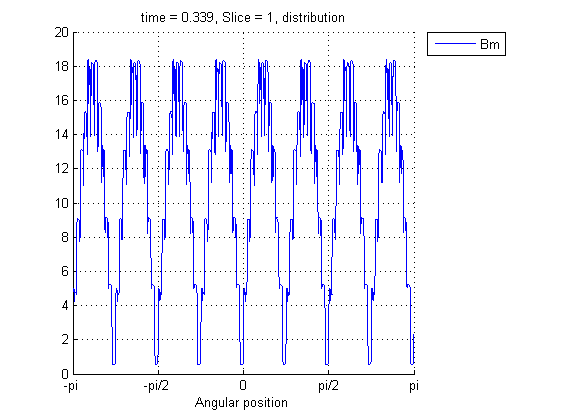

In [179]:
Image(filename='AirGapDistribution.png', width=500, height=300)

#### Magnetic vector potential

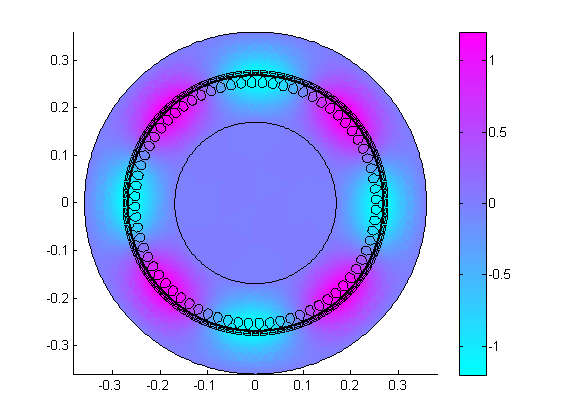

In [180]:
Image(filename='MagneticVectorPotential.png', width=500, height=300)

#### Magnetic Flux Density 

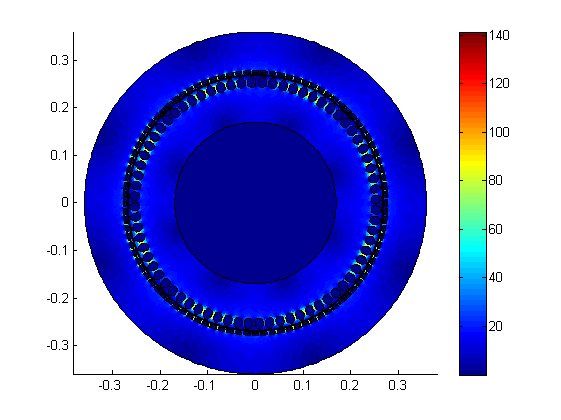

In [181]:
Image(filename='MagneticFluxDensity.png', width=500, height=300)

# COMMENT ON RESULTS

Motor Analysis tool gives limited information about the motor with given parameters. From above simulation results:
- We can see the high starting torque and current that is needed to initate rotation of motor. 
- Torque goes to 0 (zero) at steady state until a load is applied at 0.2 sec as expected.
- 300 kVA of input power result in 210 kW of mechanical power. With p.f.=0.9, real input power is 270kW. Then, efficiency is 210/270=0.77 (efficiency was 0.92 in theoretical calculations).
- Air gap distribution shows that motor consists of 8 poles. 
- Magnetic potential and flux density is not so high through the motor.

## REFERENCES

- [1] Pyrhönen J., Jokinen T. and Hrabovcova V., “Design of Rotating Electrical Machines,” John Wiley & Sons Ltd., 2008.
- [2] Boldea I. and Nasar S.A., “The Induction Machine Handbook,” CRC Press,, 2002.
- [3] Deshpande M.V., "Design and Testing of Electrical Machines," PHI Learning Pvt. Ltd., 2010.